<a href="https://colab.research.google.com/github/datascience1223/Data-Science_Projects/blob/main/Cars_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Prject on Electric Vehicle Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/Electric_Vehicle_Population_Data.csv')

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
columns= df.columns.tolist()  # check list of columns
columns

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56332 entries, 0 to 56331
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         56332 non-null  object 
 1   County                                             56329 non-null  object 
 2   City                                               56329 non-null  object 
 3   State                                              56332 non-null  object 
 4   Postal Code                                        56329 non-null  float64
 5   Model Year                                         56332 non-null  int64  
 6   Make                                               56332 non-null  object 
 7   Model                                              56332 non-null  object 
 8   Electric Vehicle Type                              56332 non-null  object 
 9   Clean 

# Observation
## there are 56332 rows and 17 columns in this dataset.
## and we can see the that there is no datatype mistakes in the dataset.


In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 147
DOL Vehicle ID                                         0
Vehicle Location                                       3
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [ ]:
df.isnull().sum() * 100 / len(df) #checking for null values in percentage

VIN (1-10)                                           0.000000
County                                               0.005326
City                                                 0.005326
State                                                0.000000
Postal Code                                          0.005326
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.260953
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005326
Electric Utility                                     0.005326
2020 Cen

<Axes: >

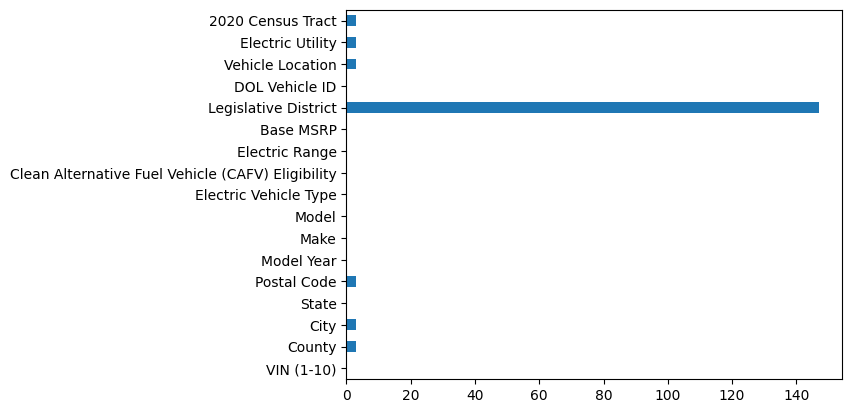

In [ ]:
# visualization of Null values using bar plot
df.isnull().sum().plot(kind='barh')   # create a bar chart for null/missing values

# Observation
## Following coloumns contains Null/Missing Values
## 2020 Census Tract, Electric Utility, Vehicle Location, Legistlative District, Postal Code, City, County.

In [ ]:
from sklearn.impute import SimpleImputer # Import SimpleImputer

In [ ]:
imputer= SimpleImputer(missing_values=np.nan, strategy="median",fill_value=None) # Imputer Initialization

# Imputation on each column
df["2020 Census Tract"] = imputer.fit_transform(df[["2020 Census Tract"]])
# df["Electric Utility"] = imputer.fit_transform(df[["Electric Utility"]])
# df["Vehicle Location"] = imputer.fit_transform(df[["Vehicle Location"]])
df["Legislative District"] = imputer.fit_transform(df[["Legislative District"]])
df["Postal Code"] = imputer.fit_transform(df[["Postal Code"]])
# df["City"] = imputer.fit_transform(df[["City"]])
# df["County"] = imputer.fit_transform(df[["County"]])


In [ ]:
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)
df['Electric Utility'].fillna('Unknown', inplace=True)


In [ ]:
df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0], inplace=True)
df['Vehicle Location'].fillna('Unknown', inplace=True)


In [ ]:
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['City'].fillna('Unknown', inplace=True)


In [ ]:
df['County'].fillna(df['County'].mode()[0], inplace=True)
df['County'].fillna('Unknown', inplace=True)


In [ ]:
# Checkking for null values

df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,56332.000000,56332.000000,56332.000000,56332.000000,56332.000000,5.633200e+04,5.633200e+04
mean,98135.187283,2020.456579,59.716200,1086.933271,29.836984,2.192410e+08,5.296156e+10
std,2787.153598,2.991454,91.971849,8215.843040,14.811992,7.633031e+07,1.738136e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,2.770200e+04,5.300000e+01
25%,98043.000000,2018.000000,0.000000,0.000000,18.000000,1.804882e+08,5.303301e+10
50%,98117.000000,2022.000000,0.000000,0.000000,34.000000,2.272880e+08,5.303303e+10
75%,98360.000000,2023.000000,83.000000,0.000000,43.000000,2.532496e+08,5.305306e+10
max,99403.000000,2024.000000,337.000000,184400.000000,49.000000,4.792548e+08,5.603300e+10


In [ ]:
df_corr = df.drop(columns='City')

In [ ]:
corr_matrix = df_corr.corr()

fig = px.imshow(corr_matrix)
fig = px.imshow(corr_matrix, color_continuous_scale='Viridis')
fig.show()

<ipython-input-33-fd03b306ac77>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **Make Prediction using RandomForestRegressor Model**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Select relevant features and target variable
features = ['Model Year','Electric Range', 'Base MSRP']
X = df[features]  # Features
y = df['Electric Range']  # Target variable (vehicle sales)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Now, make a prediction for average Electric_Range in 2025
# Assuming X_2025 contains relevant features for 2025
# let's assume average values for 2025
X_2025 = pd.DataFrame({'Model Year': [2025], 'Electric Range': [250], 'Base MSRP': [35000]})
average_Electric_Range_2025 = model.predict(X_2025)
print("Predicted average Electric_Range in 2025:", average_Electric_Range_2025)


Mean Squared Error: 5.982959084050662e-05
Predicted average Electric_Range in 2025: [249.27]


# **Visualization**

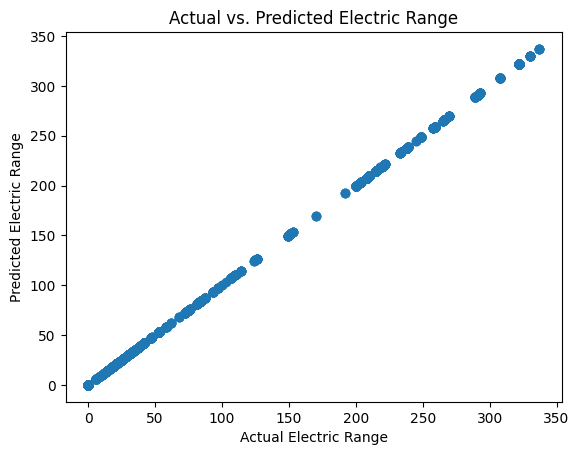

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range")
plt.title("Actual vs. Predicted Electric Range")
plt.show()


#** observation**
## it seems like good by observe the linear regression line

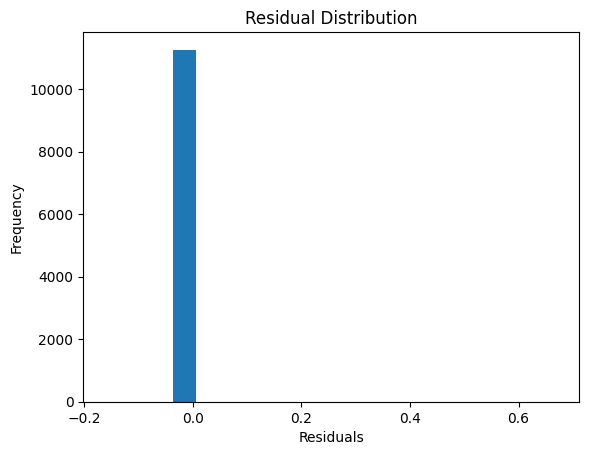

In [ ]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Absolute Error: 0.0001837223750776573
Root Mean Squared Error: 0.007734959007034661
R-squared Score: 0.9999999929140987


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())


Cross-Validation RMSE Scores: [0.00328791 0.01257797 0.01407387 0.02365652 0.00222951]
Mean Cross-Validation RMSE: 0.011165154888840633


# **observation**
# By performing the extra steps I observe that the the model is working properly and model make predictions well consistently including 2025
